# EDS Case Study

Exploring changes in outlook

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate
from utils import plot_series_lowess, plot_columns_lowess

### Loading the GSS data

In [2]:
gss = pd.read_hdf('eds.gss.hdf5', 'gss0')
gss.shape

(64814, 105)

In [3]:
def replace_invalid(df):

    # recode so depends is in the middle    
    d = {1:1, 2:0, 3:0.5}
    df.trust.replace(d, inplace=True)
    df.helpful.replace(d, inplace=True)
    df.racpres.replace(d, inplace=True)
    df.owngun.replace(d, inplace=True)
    df.fepol.replace(d, inplace=True)
    df.sexeduc.replace(d, inplace=True)

    d = {1:0, 2:1, 3:0.5}
    df.fair.replace(d, inplace=True)

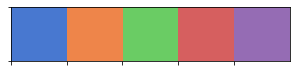

In [4]:
muted = sns.color_palette('muted', 5)
sns.palplot(muted)

In [5]:
colors = {'Conservative': muted[3], 
              'Moderate': muted[4], 
               'Liberal': muted[0]}

### 3-point scale

To make it easier to visualize groups, I'm going to lump the 7-point scale into a 3-point scale.

With this scale, there are roughly the same number of people in each group.

In [6]:
def make_polviews3(df):
    """Replace 7 point scale with 3 point scale.
    
    df: DataFrame
    """
    d = {1:'Liberal', 
         2:'Liberal', 
         3:'Liberal', 
         4:'Moderate', 
         5:'Conservative', 
         6:'Conservative', 
         7:'Conservative'}
    
    df['polviews3'] = df.polviews.replace(d)
    
make_polviews3(gss)

In [7]:
def values(series):
    return series.value_counts().sort_index()

values(gss['polviews3'])

Conservative    19129
Liberal         14979
Moderate        21444
Name: polviews3, dtype: int64

## Fair

Response to [this question](https://gssdataexplorer.norc.org/projects/52787/variables/440/vshow):

Do you think most people would try to take advantage of you if they got a chance, or would they try to be fair?

```
1	Take advantage
2	Fair
3	Depends
```


In [8]:
values(gss['fair'])

1.0    15435
2.0    22806
3.0     2755
Name: fair, dtype: int64

In [9]:
d = {1:0, 2:1, 3:0.5}
gss['fair'].replace(d, inplace=True)
values(gss['fair'])

0.0    15435
0.5     2755
1.0    22806
Name: fair, dtype: int64

In [10]:
def group_by_year(df, varname):
    """Group by year and compute mean of `varname`.
    
    df: DataFrame
    varname: string variable name
    
    returns: Series
    """
    grouped = df.groupby('year')
    return grouped[varname].mean().dropna()

In [11]:
def decorate_by_year(**options):
    """Label the axes.
    
    options: keyword arguments passed to `decorate`.
    """
    decorate(xlabel='Year',
             ylabel='Fraction saying yes',
             xlim=[1970, 2020],
             **options)

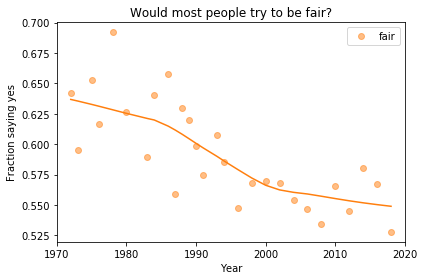

In [12]:
mean_by_year = group_by_year(gss, 'fair')
plot_series_lowess(mean_by_year, 'C1')

title='Would most people try to be fair?'
decorate_by_year(title=title)

In [13]:
def group_by_polviews(df, varname):
    """Group by polviews and year, and compute mean of varname.
    
    df: DataFrame
    varname: string variable name
    
    returns: DataFrame
    """
    grouped = df.groupby(['polviews3', 'year'])
    return grouped[varname].mean().dropna().unstack(level=0)

In [14]:
mean_by_polviews = group_by_polviews(gss, 'fair')
mean_by_polviews.head()

polviews3,Conservative,Liberal,Moderate
year,,,
1975,0.653941,0.649775,0.689493
1976,0.643973,0.607673,0.624555
1978,0.725636,0.689614,0.686364
1980,0.624719,0.586538,0.658416
1983,0.604240,0.615854,0.515873


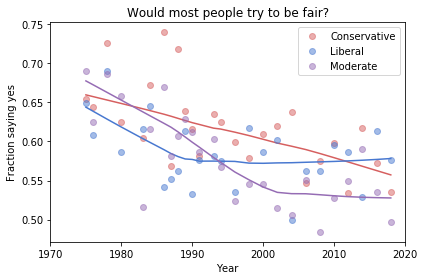

In [15]:
columns = ['Conservative', 'Liberal', 'Moderate']
plot_columns_lowess(mean_by_polviews, columns, colors)
decorate_by_year(title=title)

## Trust

Response to [this question](https://gssdataexplorer.norc.org/projects/52787/variables/441/vshow)

> Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people?

```
1	Can trust
2	Cannot trust
3	Depends
```

In [16]:
values(gss['trust'])

1.0    15271
2.0    24231
3.0     1882
Name: trust, dtype: int64

In [17]:
d = {1:1, 2:0, 3:0.5}
gss['trust'].replace(d, inplace=True)
values(gss['trust'])

0.0    24231
0.5     1882
1.0    15271
Name: trust, dtype: int64

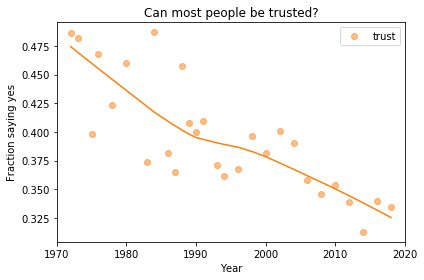

In [18]:
mean_by_year = group_by_year(gss, 'trust')
plot_series_lowess(mean_by_year, 'C1')

title='Can most people be trusted?'
decorate_by_year(title=title)

In [19]:
mean_by_polviews = group_by_polviews(gss, 'trust')
mean_by_polviews.head()

polviews3,Conservative,Liberal,Moderate
year,,,
1975,0.383863,0.449438,0.383396
1976,0.465011,0.502475,0.469858
1978,0.440252,0.481971,0.393560
1980,0.442350,0.472299,0.483580
1983,0.397213,0.400602,0.358491


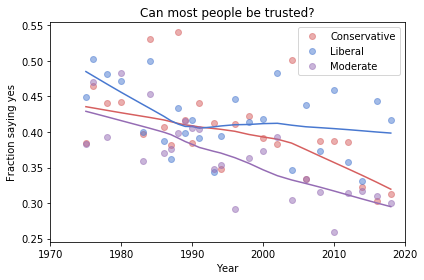

In [20]:
columns = ['Conservative', 'Liberal', 'Moderate']
plot_columns_lowess(mean_by_polviews, columns, colors)
decorate_by_year(title=title)

## Helpful

Response to [this question](https://gssdataexplorer.norc.org/projects/52787/variables/439/vshow):

>Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves?

```
1	Helpful
2	Lookout for self
3	Depends
```

In [21]:
values(gss['helpful'])

1.0    19869
2.0    18443
3.0     2809
Name: helpful, dtype: int64

In [22]:
d = {1:1, 2:0, 3:0.5}
gss['helpful'].replace(d, inplace=True)
values(gss['helpful'])

0.0    18443
0.5     2809
1.0    19869
Name: helpful, dtype: int64

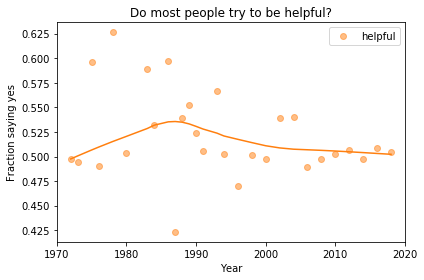

In [23]:
mean_by_year = group_by_year(gss, 'helpful')
plot_series_lowess(mean_by_year, 'C1')

title='Do most people try to be helpful?'
decorate_by_year(title=title)

In [24]:
mean_by_polviews = group_by_polviews(gss, 'helpful')
mean_by_polviews.head()

polviews3,Conservative,Liberal,Moderate
year,,,
1975,0.617574,0.608744,0.593110
1976,0.500000,0.506188,0.484902
1978,0.639241,0.592995,0.650180
1980,0.492222,0.509749,0.504942
1983,0.581272,0.554217,0.552050


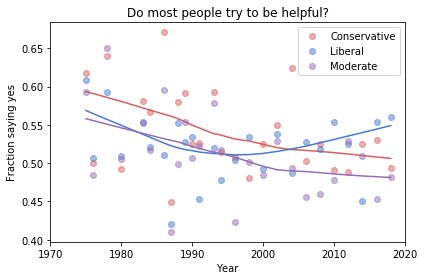

In [25]:
columns = ['Conservative', 'Liberal', 'Moderate']
plot_columns_lowess(mean_by_polviews, columns, colors)
decorate_by_year(title=title)